In [3]:
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertModel

In [86]:
import torch
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

In [5]:
covid_tokenizer= AutoTokenizer.from_pretrained("gsarti/covidbert-nli")
covid_model = AutoModel.from_pretrained("gsarti/covidbert-nli")

In [6]:
scibert_tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
scibert_model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

In [7]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [11]:
path = "C:\\Users\\User\\OneDrive - NTNU\\NTNU\\Prosjekt oppgave NLP\\dataset\\CORD-19\\"

labeled_data = []
with open(path + "labeled_data_cord_19.txt", "rb") as fp:   # Unpickling
    labeled_data = pickle.load(fp)

In [ ]:
from pandas import read_csv

path = "C:\\Users\\User\\OneDrive - NTNU\\NTNU\\Prosjekt oppgave NLP\\dataset\\CORD-19\\"
docs = read_csv(path + "crod_19_only_rel.csv")
docs.shape

In [74]:
path = "C:\\Users\\User\\OneDrive - NTNU\\NTNU\\Prosjekt oppgave NLP\\dataset\\CORD-19\\"
topics = read_csv(path + "topics.csv")

In [17]:
def tokenize(model, tokenizer, sentence):
    
    # Tokens comes from a process that splits the input into sub-entities with interesting linguistic properties.
    tokens = tokenizer.tokenize(sentence.lower())

    # This is not sufficient for the model, as it requires integers as input, 
    # not a problem, let's convert tokens to ids.
    tokens_ids = tokenizer.convert_tokens_to_ids(tokens)
 

    # Add the required special tokens
    tokens_ids = tokenizer.build_inputs_with_special_tokens(tokens_ids)

    # We need to convert to a Deep Learning framework specific format, let's use PyTorch for now.
    tokens_pt = torch.tensor([tokens_ids])

    # Now we're ready to go through BERT with out input
    outputs, pooled = model(tokens_pt)
    return pooled

In [21]:
sent = "Applying this asymptotic estimator to cumulative, n95, coronavirus, corona pandemic"
tokenize(scibert_model, scibert_tokenizer, sent)

tensor([[ 6.6705e-02,  1.6534e-01,  8.9143e-01,  9.6088e-01,  4.9221e-01,
          7.8532e-01,  5.6010e-01, -9.6881e-01,  5.2060e-01, -2.8431e-01,
         -1.3938e-02,  5.1639e-01, -9.8947e-01,  8.5994e-01,  1.4345e-01,
         -3.3124e-01, -4.5232e-01, -3.9170e-01, -8.2579e-01, -8.3976e-01,
         -1.0989e-01,  2.1799e-01, -9.3995e-01,  4.9136e-01,  9.8346e-01,
         -9.7951e-01, -9.9496e-01,  3.8363e-02, -1.0526e-01,  1.1924e-01,
          2.4874e-01, -9.9635e-01,  4.3858e-01, -4.1921e-01, -6.6739e-01,
          1.4181e-01,  8.5541e-01,  5.9912e-02,  6.1849e-01, -6.1971e-02,
         -2.0442e-01,  2.6549e-01,  9.3548e-01, -1.8293e-01,  4.3210e-01,
         -2.4999e-01, -3.6837e-01, -2.3932e-01, -9.1719e-01,  6.9558e-01,
          2.5983e-01, -2.8439e-01, -4.8147e-01,  9.2463e-01,  8.7717e-01,
         -3.1232e-01, -1.0043e-01,  2.1333e-01, -9.1982e-01, -9.5412e-01,
          1.1472e-02, -8.7538e-01,  3.3327e-01, -9.2299e-01,  6.4533e-01,
         -4.3824e-01, -3.7380e-01, -2.

In [24]:
labeled_data[0]['relevant_docs'][0:100]

[{'id': '005b2j4b', 'score': 2},
 {'id': '00fmeepz', 'score': 1},
 {'id': '010vptx3', 'score': 2},
 {'id': '0194oljo', 'score': 1},
 {'id': '021q9884', 'score': 1},
 {'id': '02f0opkr', 'score': 1},
 {'id': '047xpt2c', 'score': 0},
 {'id': '04ftw7k9', 'score': 0},
 {'id': '05qglt1f', 'score': 0},
 {'id': '05vx82oo', 'score': 0},
 {'id': '0604jed8', 'score': 0},
 {'id': '06o2tbon', 'score': 0},
 {'id': '06ya15z8', 'score': 0},
 {'id': '084o1dmp', 'score': 0},
 {'id': '08ds967z', 'score': 1},
 {'id': '08efpohc', 'score': 0},
 {'id': '0b4o0ccp', 'score': 0},
 {'id': '0be4wta5', 'score': 2},
 {'id': '0chuwvg6', 'score': 2},
 {'id': '0cvoeiy0', 'score': 0},
 {'id': '0e1w86tg', 'score': 1},
 {'id': '0evw0fc5', 'score': 1},
 {'id': '0hnh4n9e', 'score': 1},
 {'id': '0iq9s94n', 'score': 1},
 {'id': '0khg28ex', 'score': 0},
 {'id': '0l33i6s4', 'score': 0},
 {'id': '0lyxvex0', 'score': 0},
 {'id': '0m5mc320', 'score': 0},
 {'id': '0ne21in2', 'score': 1},
 {'id': '0nh58odf', 'score': 2},
 {'id': '0

In [25]:
path_metadata = "C:\\Users\\User\\OneDrive - NTNU\\NTNU\\Prosjekt oppgave NLP\\dataset\\CORD-19\\metadata\\"
file = "metadata.csv"

metadata_pd = pd.read_csv(path_metadata + file)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,6,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
path = "C:\\Users\\User\\OneDrive - NTNU\\NTNU\\Prosjekt oppgave NLP\\dataset\\CORD-19\\"
relvency_data = pd.read_csv(path + "relevance_data.csv")

In [27]:
relvency_data.head(2)

,Unnamed: 0,topic_id,round_id,cord_uid,relevancy
0,0,1,4.5,005b2j4b,2
1,1,1,4.0,00fmeepz,1


In [28]:
relvency_data_top_1 = relvency_data[relvency_data["topic_id"] == 1]

In [30]:
relvency_data_top_1_red = relvency_data_top_1.sample(n=100)

In [35]:
cord_uid = relvency_data_top_1_red.cord_uid.unique()

array(['vmhrt6bk', '4ko557n1', '262bcl7h', 'x3sb1o4u', 'kbux2l4o',
       'ft4rbcxf', 'ut61qxyc', 'bupb4ooh', 'rehr84c7', 'uvavdk6n',
       '22fc1qly', 'lj8t52yl', '0t2a5500', 'wuegn0jg', 'pjgngs6u',
       'e1urdt9w', 'f3g3ek5u', 'qubmr10h', 'tfspedf1', 'zv0ysi8m',
       'ex7rta8f', 'a845az43', 'gs4r9j7o', '43gik8e3', 'zxvim4t8',
       'v92f17b6', '6bzfptbs', '6cbnpqjj', 'pidy7erw', 'u1k48t29',
       'z122v1uz', 'frkk6w0a', 'g4bsul8u', 'p15bdmo2', 'kbvy4g7i',
       'igdkz3ht', 'pphi42lj', 'gy8d8285', 'u7u75sl0', 'sphwclzs',
       '73a7uvyz', 'i2ppoe55', '8xz0ddci', 'xubsodnk', 'pn9nwl64',
       '5fg87lvu', '0khg28ex', 'z9dolxky', 'uj0i2anr', '5hth74jb',
       'uj96zdld', 'flc25wlz', 'bawgldfi', 'u19e9j2w', 'sn1a7ikq',
       '4ulei2uh', '8arwlhf0', 'ptizke03', 'juz9jnfk', '8pkrg0mx',
       'uqahztur', 'dr7cz1jo', 'm40kwgcg', 'z0ni2jsr', 'vndydx85',
       'btiy6jhr', 'xvfl7ycj', 'x64cwmqf', 'hwjr891o', 'ox7xetlq',
       't8j4q00m', 'xa8b1nuo', '1eytelxn', 'xvnv17zy', 'uzdydm

In [38]:
metatada_red = metadata_pd[metadata_pd["cord_uid"].isin(cord_uid)]

In [40]:
metatada_red = metatada_red[["cord_uid", "title", "abstract"]]

In [62]:
metatada_red["sci_bert_title"] = [0]

ValueError: Length of values does not match length of index

KeyError: 0

In [71]:
embeddings = metatada_red.apply(
    lambda row: tokenize(scibert_model, scibert_tokenizer, row["title"]) , axis = 1)
metatada_red["sci_bert_title"] = embeddings

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
embeddings = metatada_red.apply(
    lambda row: tokenize(covid_model, covid_tokenizer, row["title"]) , axis = 1)
metatada_red["covid_bert_title"] = embeddings

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
embeddings = metatada_red.apply(
    lambda row: tokenize(bert_model, bert_tokenizer, row["title"]) , axis = 1)
metatada_red["bert_title"] = embeddings

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
metatada_red.head()

,cord_uid,title,abstract,sci_bert_title,covid_bert_title,bert_title
515,sn1a7ikq,Tylosema esculentum (Marama) Tuber and Bean Ex...,Tylosema esculentum (marama) beans and tubers ...,"[[tensor(0.1329, grad_fn=<SelectBackward>), te...","[[tensor(-0.8795, grad_fn=<SelectBackward>), t...","[[tensor(-0.9151, grad_fn=<SelectBackward>), t..."
780,uj96zdld,Resveratrol Inhibits KSHV Reactivation by Lowe...,"In the field of herpesvirus research, the exac...","[[tensor(-0.1614, grad_fn=<SelectBackward>), t...","[[tensor(-0.8929, grad_fn=<SelectBackward>), t...","[[tensor(-0.9007, grad_fn=<SelectBackward>), t..."
14115,1eytelxn,Latest SARS evidence,NaN,"[[tensor(-0.2126, grad_fn=<SelectBackward>), t...","[[tensor(-0.7040, grad_fn=<SelectBackward>), t...","[[tensor(-0.9256, grad_fn=<SelectBackward>), t..."
15740,gy8d8285,The Origin and Evolution of Viruses,The lecture covers three main topics: (i) Viru...,"[[tensor(-0.5064, grad_fn=<SelectBackward>), t...","[[tensor(-0.7533, grad_fn=<SelectBackward>), t...","[[tensor(-0.8798, grad_fn=<SelectBackward>), t..."
23068,zv0ysi8m,Current Insight into the Novel Coronavirus Dis...,SARS-CoV-2 is a novel strain of coronavirus th...,"[[tensor(0.0010, grad_fn=<SelectBackward>), te...","[[tensor(-0.7756, grad_fn=<SelectBackward>), t...","[[tensor(-0.9033, grad_fn=<SelectBackward>), t..."


In [83]:
query = topics["query"][0]
question = topics["question"][0]
narrative = topics["narrative"][0]

In [84]:
bert_query = tokenize(bert_model, bert_tokenizer, query)
scibert_query =  tokenize(scibert_model, scibert_tokenizer, query)
covidbert_query = tokenize(covid_model, covid_tokenizer, query)

bert_question = tokenize(bert_model, bert_tokenizer, question)
scibert_question =  tokenize(scibert_model, scibert_tokenizer, question)
covidbert_question = tokenize(covid_model, covid_tokenizer, question)

bert_narrative = tokenize(bert_model, bert_tokenizer, narrative)
scibert_narrative =  tokenize(scibert_model, scibert_tokenizer, narrative)
covidbert_narrative = tokenize(covid_model, covid_tokenizer, narrative)

In [87]:
cos_sim_bert = metatada_red.apply(
    lambda row: util.pytorch_cos_sim(bert_query, row["bert_title"]) , axis = 1)
metatada_red["cos_sim_bert"] = cos_sim_bert

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
cos_sim_scibert = metatada_red.apply(
    lambda row: util.pytorch_cos_sim(scibert_query, row["sci_bert_title"]) , axis = 1)
metatada_red["cos_sim_scibert"] = cos_sim_scibert

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
cos_sim_covidbert = metatada_red.apply(
    lambda row: util.pytorch_cos_sim(covidbert_query, row["covid_bert_title"]) , axis = 1)
metatada_red["cos_sim_covidbert"] = cos_sim_covidbert

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
metatada_red["cos_sim_scibert"]

515       [[tensor(0.6535, grad_fn=<SelectBackward>)]]
780       [[tensor(0.6932, grad_fn=<SelectBackward>)]]
14115     [[tensor(0.8492, grad_fn=<SelectBackward>)]]
15740     [[tensor(0.7639, grad_fn=<SelectBackward>)]]
23068     [[tensor(0.4240, grad_fn=<SelectBackward>)]]
                              ...                     
294079    [[tensor(0.9220, grad_fn=<SelectBackward>)]]
295817    [[tensor(0.4211, grad_fn=<SelectBackward>)]]
300719    [[tensor(0.3732, grad_fn=<SelectBackward>)]]
300845    [[tensor(0.4894, grad_fn=<SelectBackward>)]]
301384    [[tensor(0.7201, grad_fn=<SelectBackward>)]]
Name: cos_sim_scibert, Length: 97, dtype: object

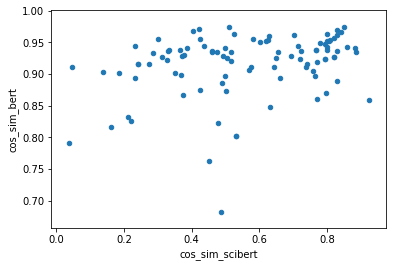

In [94]:
metatada_red.plot(x = "cos_sim_scibert", y = "cos_sim_bert", kind = "scatter", color = "relevancy_1")

In [ ]:
cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]

In [98]:
def get_relevancy(cord_uid, topic_id, relevancy_df):
    top_df = relevancy_df[relevancy_df["topic_id"] == topic_id]
    top_df = top_df[top_df["cord_uid"] == cord_uid]
    rel = "NaN"
    for index, row in top_df.iterrows():
        rel = row["relevancy"]
    return rel

In [101]:
relvency_data.head()

,Unnamed: 0,topic_id,round_id,cord_uid,relevancy
0,0,1,4.5,005b2j4b,2
1,1,1,4.0,00fmeepz,1
2,2,1,0.5,010vptx3,2
3,3,1,2.5,0194oljo,1
4,4,1,4.0,021q9884,1


In [103]:
get_relevancy("005b2jsdasfd", 1, relvency_data)

'NaN'

In [104]:
metatada_red.assign(relevancy_1 = lambda x: get_relevancy(x.cord_uid, 1,relvency_data))

ValueError: Can only compare identically-labeled Series objects

In [105]:
rel_top_1 = metatada_red.apply(
    lambda row: get_relevancy(row["cord_uid"], 1,relvency_data), axis = 1)
metatada_red["relevancy_1"] = rel_top_1

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
metatada_red.head(2)

,cord_uid,title,abstract,sci_bert_title,covid_bert_title,bert_title,cos_sim_bert,cos_sim_scibert,cos_sim_covidbert,relevancy_1
515,sn1a7ikq,Tylosema esculentum (Marama) Tuber and Bean Ex...,Tylosema esculentum (marama) beans and tubers ...,"[[tensor(0.1329, grad_fn=<SelectBackward>), te...","[[tensor(-0.8795, grad_fn=<SelectBackward>), t...","[[tensor(-0.9151, grad_fn=<SelectBackward>), t...","[[tensor(0.9353, grad_fn=<SelectBackward>)]]","[[tensor(0.6535, grad_fn=<SelectBackward>)]]","[[tensor(0.8799, grad_fn=<SelectBackward>)]]",0
780,uj96zdld,Resveratrol Inhibits KSHV Reactivation by Lowe...,"In the field of herpesvirus research, the exac...","[[tensor(-0.1614, grad_fn=<SelectBackward>), t...","[[tensor(-0.8929, grad_fn=<SelectBackward>), t...","[[tensor(-0.9007, grad_fn=<SelectBackward>), t...","[[tensor(0.9275, grad_fn=<SelectBackward>)]]","[[tensor(0.6932, grad_fn=<SelectBackward>)]]","[[tensor(0.8467, grad_fn=<SelectBackward>)]]",0


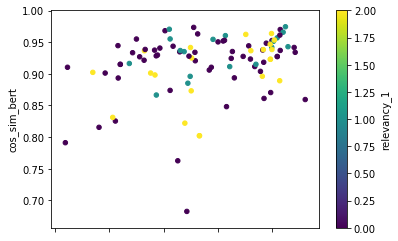

In [109]:
metatada_red.plot(x = "cos_sim_scibert", y = "cos_sim_bert", kind = "scatter", c = "relevancy_1",colormap='viridis')